In [ ]:
!pip install chempy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.7/184.7 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.2/101.2 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.9/107.9 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 35.5 MB/s eta 0:00:00
  Created wheel for chempy: filename=chempy-0.9.0-py2.py3-none-any.whl size=210809 sha256=0767e75e9a2371c32bf5b6676ef1a345743772168900065dd157b238cf6ee563
  Stored in directory: /root/.cache/pip/wheels/67/6a/c8/0b931e3c1c6c4e620af52ab72afb8377af84307fc715d3d72b
  Created wheel for pyneqsys: filename=pyneqsys-0.5.7-py2.py3-none-any.whl size=27263 sha256=f9ab64db7837546ada0a2c2cc1030a728320162087b0c93d5983bb7adbb6734b
  Stored i

In [ ]:
from chempy import ReactionSystem

rsys = ReactionSystem.from_string(
    """
  2 Fe+2 + H2O2 -> 2 Fe+3 + 2 OH-; 42
  2 Fe+3 + H2O2 -> 2 Fe+2 + O2 + 2 H+; 17
  H+ + OH- -> H2O; 1e10
  H2O -> H+ + OH-; 1e-4
"""
)

In [ ]:
from chempy.kinetics.ode import get_odesys

odesys, extra = get_odesys(rsys)

In [ ]:
for index, exp in enumerate(odesys.exprs):
    print(odesys.names[index], ": ", f"dy_{index}/dt", "= ", exp)

Fe+2 :  dy_0/dt =  -84*y_0**2*y_4 + 34*y_1**2*y_4
Fe+3 :  dy_1/dt =  84*y_0**2*y_4 - 34*y_1**2*y_4
H+ :  dy_2/dt =  34*y_1**2*y_4 - 10000000000.0*y_2*y_6 + 0.0001*y_3
H2O :  dy_3/dt =  10000000000.0*y_2*y_6 - 0.0001*y_3
H2O2 :  dy_4/dt =  -42*y_0**2*y_4 - 17*y_1**2*y_4
O2 :  dy_5/dt =  17*y_1**2*y_4
OH- :  dy_6/dt =  84*y_0**2*y_4 - 10000000000.0*y_2*y_6 + 0.0001*y_3


Text(0.5, 0, 't')

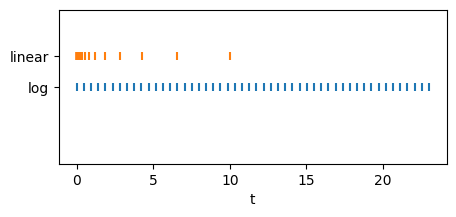

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5, 2))
ax = fig.add_subplot(111)
t_lin = np.linspace(0, 23)
t_log = np.logspace(-8, 1)
ax.scatter(t_lin, np.ones(len(t_lin)), marker="|")
ax.scatter(t_log, np.ones(len(t_log)) + 0.2, marker="|")
ax.set_ylim(0.5, 1.5)
ax.set_yticks([1, 1.2])
ax.set_yticklabels(["log", "linear"])
ax.set_xlabel("t")

In [ ]:
tout = sorted(np.concatenate((t_lin, t_log)))

In [ ]:
c0 = {
    "Fe+2": 0.05,
    "Fe+3": 0.0,
    "H2O2": 0.1,
    "H2O": 1.0,
    "O2": 0.0,
    "H+": 1e-2,
    "OH-": 1e-12,
}

In [ ]:
result = odesys.integrate(tout, c0, atol=1e-12, rtol=1e-14)

In [ ]:
import pandas as pd

conc = pd.DataFrame(result[1], columns=result.odesys.names)
conc["time"] = tout
conc

,Fe+2,Fe+3,H+,H2O,H2O2,O2,OH-,time
0,0.050000,0.000000e+00,1.000000e-02,1.000000,0.100000,0.000000e+00,1.000000e-12,0.000000e+00
1,0.050000,2.100000e-10,1.000000e-02,1.000000,0.100000,2.499000e-28,1.335788e-10,1.000000e-08
2,0.050000,3.205478e-10,1.000000e-02,1.000000,0.100000,8.887644e-28,1.652483e-10,1.526418e-08
3,0.050000,4.892899e-10,1.000000e-02,1.000000,0.100000,3.192979e-27,1.912936e-10,2.329952e-08
4,0.050000,7.468609e-10,9.999999e-03,1.000000,0.100000,1.126920e-26,2.052554e-10,3.556480e-08
...,...,...,...,...,...,...,...,...
95,0.019453,3.054713e-02,7.801300e-12,1.047504,0.047222,1.875202e-02,2.054713e-02,2.112245e+01
96,0.019452,3.054838e-02,7.693879e-12,1.048202,0.046524,1.910105e-02,2.054838e-02,2.159184e+01
97,0.019451,3.054948e-02,7.588033e-12,1.048890,0.045835,1.944493e-02,2.054948e-02,2.206122e+01
98,0.019450,3.055045e-02,7.483740e-12,1.049568,0.045157,1.978375e-02,2.055045e-02,2.253061e+01


Text(0, 0.5, 'Conc')

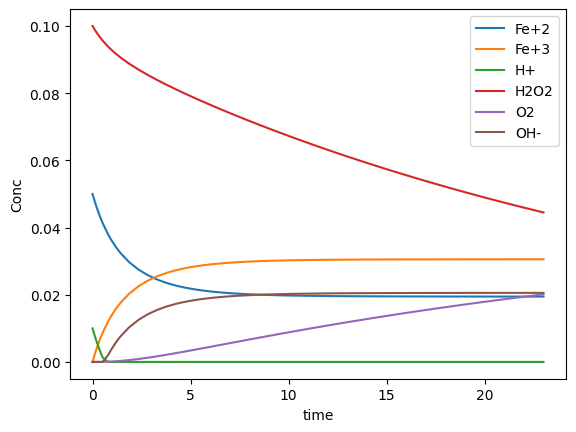

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
for col in conc.columns:
    if col != "time" and col != "H2O":
        ax.plot(conc["time"], conc[col], label=col)
ax.legend()
ax.set_xlabel("time")
ax.set_ylabel("Conc")

In [ ]:
from chempy import Substance

rsys = ReactionSystem.from_string(
    """
  A -> B; 0.1
  B -> C; 1
 """,
    substance_factory=Substance,
)

In [ ]:
odesys, extra = get_odesys(rsys)
for index, exp in enumerate(odesys.exprs):
    print(odesys.names[index], ": ", f"dy_{index}/dt", "= ", exp)

A :  dy_0/dt =  -0.1*y_0
B :  dy_1/dt =  0.1*y_0 - y_1
C :  dy_2/dt =  y_1


In [ ]:
c0 = {
    "A": 5.0,
    "B": 0.0,
    "C": 0.0,
}

In [ ]:
result = odesys.integrate(tout, c0, atol=1e-12, rtol=1e-14)

In [ ]:
conc = pd.DataFrame(result[1], columns=result.odesys.names)
conc["time"] = tout
conc

,A,B,C,time
0,5.000000,0.000000e+00,0.000000e+00,0.000000e+00
1,5.000000,5.000000e-09,2.500000e-17,1.000000e-08
2,5.000000,7.632090e-09,5.824879e-17,1.526418e-08
3,5.000000,1.164976e-08,1.357169e-16,2.329952e-08
4,5.000000,1.778240e-08,3.162138e-16,3.556480e-08
...,...,...,...,...
95,0.604831,6.720339e-02,4.327966e+00,2.112245e+01
96,0.577097,6.412183e-02,4.358782e+00,2.159184e+01
97,0.550634,6.118158e-02,4.388184e+00,2.206122e+01
98,0.525385,5.837615e-02,4.416239e+00,2.253061e+01


Text(0, 0.5, 'Conc')

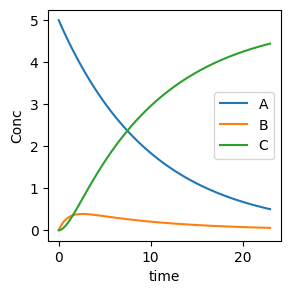

In [ ]:
fig = plt.figure(figsize=(3, 3))
ax = fig.add_subplot(111)
for col in conc.columns:
    if col != "time":
        ax.plot(conc["time"], conc[col], label=col)
ax.legend()
ax.set_xlabel("time")
ax.set_ylabel("Conc")

Analytical solutions are:

$[A]=[A]_0 \exp(-k_1t)$

$[B]=[A]_0\frac{k_1}{k_1－k_2}(\exp (-k_2t)-\exp (-k_1t))$

$[C]=[A]_0 - [A] - (\frac{[A]_0k_1}{k_2-k_1}[B]) + [C]_0$

In [ ]:
k1 = 0.1
k2 = 1.0
t = np.array(tout)
A_a = c0["A"] * np.exp(-k1 * t)
B_a = c0["A"] * k1 / (k1 - k2) * (np.exp(-k2 * t) - np.exp(-k1 * t))
C_a = c0["A"] - A_a - (c0["A"] * k1 / (k2 - k1) * B_a) + c0["C"]

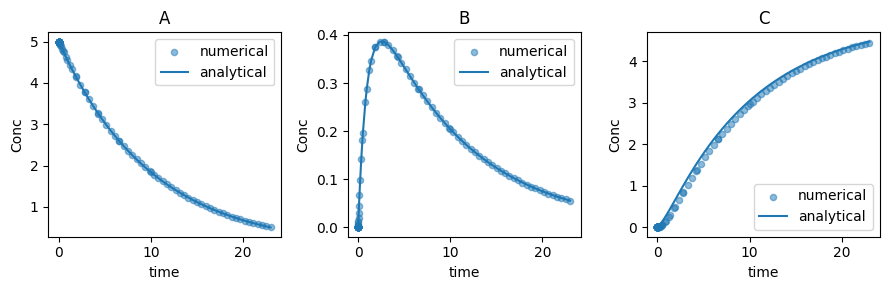

In [ ]:
fig = plt.figure(figsize=(9, 3))
ax = fig.add_subplot(1, 3, 1)
ax.scatter(conc["time"], conc["A"], label="numerical", s=20, alpha=0.5)
ax.plot(tout, A_a, label="analytical")
ax.legend()
ax.set_xlabel("time")
ax.set_ylabel("Conc")
ax.set_title("A")

ax = fig.add_subplot(1, 3, 2)
ax.scatter(conc["time"], conc["B"], label="numerical", s=20, alpha=0.5)
ax.plot(tout, B_a, label="analytical")
ax.legend()
ax.set_xlabel("time")
ax.set_ylabel("Conc")
ax.set_title("B")

ax = fig.add_subplot(1, 3, 3)
ax.scatter(conc["time"], conc["C"], label="numerical", s=20, alpha=0.5)
ax.plot(tout, C_a, label="analytical")
ax.legend()
ax.set_xlabel("time")
ax.set_ylabel("Conc")
ax.set_title("C")

plt.tight_layout()

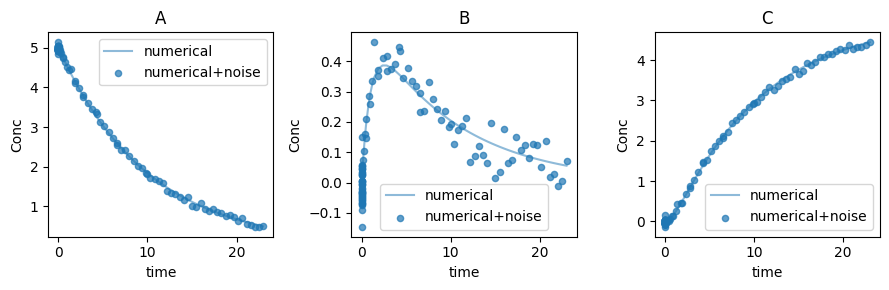

In [ ]:
rng = np.random.default_rng()
noise = rng.standard_normal(len(conc))

fig = plt.figure(figsize=(9, 3))
for i, item in enumerate(["A", "B", "C"]):
    conc[f"{item}_noise"] = conc[item] + noise * 0.05
    ax = fig.add_subplot(1, 3, i + 1)
    ax.plot(conc["time"], conc[item], label="numerical", zorder=1, alpha=0.5)
    ax.scatter(
        conc["time"], conc[f"{item}_noise"], label="numerical+noise", alpha=0.7, s=20
    )
    ax.legend()
    ax.set_xlabel("time")
    ax.set_ylabel("Conc")
    ax.set_title(item)
plt.tight_layout()

In [ ]:
!pip install pysr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 1.8 MB/s eta 0:00:00


In [ ]:
from pysr import PySRRegressor

model = PySRRegressor(
    niterations=5,
    binary_operators=["+", "*", "-", "/"],
    unary_operators=[
        "square",
        "exp",
        "inv(x) = 1/x",
    ],
    extra_sympy_mappings={"inv": lambda x: 1 / x},
    elementwise_loss="loss(prediction, target) = (prediction - target)^2",
)

In [ ]:
x = conc["time"].values.reshape(-1, 1)
y = conc["A_noise"].values.reshape(-1, 1)
model.fit(x, y)

/usr/local/lib/python3.10/dist-packages/pysr/sr.py:1302: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!


PySRRegressor.equations_ = [
	    pick         score                                           equation  \
	0         0.000000e+00                                     exp(1.1678141)   
	1         7.870722e-03                             1.1455847 - -2.2237806   
	2         3.687830e-07                       exp(0.07960134) - -2.2855914   
	3         2.406080e+00                    (x0 * -0.19472238) - -4.7569547   
	4         1.479923e-01           exp(inv((x0 * 0.10636799) + 0.61384815))   
	5         1.691647e+00  square(-1.9501779 - (0.24085939 + (x0 * -0.080...   
	6         1.278339e+00  exp(1.530758 - (x0 * inv(8.018902))) - -0.3963168   
	7   >>>>  1.363894e+00  exp(1.604021 - (x0 * inv(9.861415))) + inv(31....   
	8         6.934897e-02  exp(((x0 / -1.2277384) * 0.122841686) + square...   
	9         7.230081e-06  exp((1.7181976 + -0.07875841) - (x0 * inv(9.99...   
	10        6.477802e-03  exp(1.613884 - (square(inv(8.080643 / -0.90055...   
	11        8.648182e-04  -0.019070417 + exp(square(1.2619461) + ((((exp...   
	12        3.625698e-03  exp((((0.21405177 * x0) / square(-2.28683)) + ...   
	13        5.734147e-03  exp(square(1.2680317) + (x0 / ((1.1200631 - (x...   
	
	        loss  complexity  
	0   3.006354           2  
	1   2.982785           3  
	2   2.982784           4  
	3   0.268952           5  
	4   0.200046           7  
	5   0.036852           8  
	6   0.010263           9  
	7   0.002624          10  
	8   0.002448          11  
	9   0.002448          12  
	10  0.002417          14  
	11  0.002412          16  
	12  0.002386          19  
	13  0.002373          20  
]

In [ ]:
model.equations_

,complexity,loss,score,equation,sympy_format,lambda_format
0,2,3.006354,0.000000e+00,exp(1.1678141),3.21495737681053,PySRFunction(X=>3.21495737681053)
1,3,2.982785,7.870722e-03,1.1455847 - -2.2237806,3.36936530000000,PySRFunction(X=>3.36936530000000)
2,4,2.982784,3.687830e-07,exp(0.07960134) - -2.2855914,3.36844669052442,PySRFunction(X=>3.36844669052442)
3,5,0.268952,2.406080e+00,(x0 * -0.19472238) - -4.7569547,4.7569547 - 0.19472238*x0,PySRFunction(X=>4.7569547 - 0.19472238*x0)
4,7,0.200046,1.479923e-01,exp(inv((x0 * 0.10636799) + 0.61384815)),exp(1/(0.10636799*x0 + 0.61384815)),PySRFunction(X=>exp(1/(0.10636799*x0 + 0.61384...
5,8,0.036852,1.691647e+00,square(-1.9501779 - (0.24085939 + (x0 * -0.080...,4.80064440617054*(0.0368448608193245*x0 - 1)**2,PySRFunction(X=>4.80064440617054*(0.0368448608...
6,9,0.010263,1.278339e+00,exp(1.530758 - (x0 * inv(8.018902))) - -0.3963168,0.3963168 + 4.62167872738544*exp(-0.1247053524...,PySRFunction(X=>0.3963168 + 4.62167872738544*e...
7,10,0.002624,1.363894e+00,exp(1.604021 - (x0 * inv(9.861415))) + inv(31....,0.031939991654719 + 4.9729886629027*exp(-0.101...,PySRFunction(X=>0.031939991654719 + 4.97298866...
8,11,0.002448,6.934897e-02,exp(((x0 / -1.2277384) * 0.122841686) + square...,4.99287211727386*exp(-0.100055260957872*x0),PySRFunction(X=>4.99287211727386*exp(-0.100055...
9,12,0.002448,7.230081e-06,exp((1.7181976 + -0.07875841) - (x0 * inv(9.99...,4.99234688083626*exp(-0.100009680937115*x0),PySRFunction(X=>4.99234688083626*exp(-0.100009...


In [ ]:
y_pred = model.predict(x, 7)

Text(0.5, 1.0, 'A')

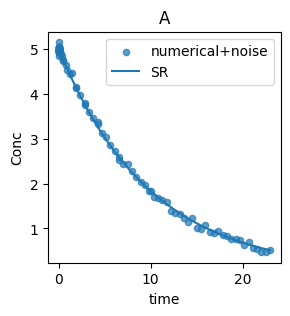

In [ ]:
fig = plt.figure(figsize=(3, 3))
ax = fig.add_subplot(111)
ax.scatter(x, y, label="numerical+noise", alpha=0.7, s=20)
ax.plot(x, y_pred, label="SR")
ax.legend()
ax.set_xlabel("time")
ax.set_ylabel("Conc")
ax.set_title("A")

In [ ]:
x = conc["time"].values.reshape(-1, 1)
y = conc["B_noise"].values.reshape(-1, 1)
model.fit(x, y)

/usr/local/lib/python3.10/dist-packages/pysr/sr.py:1837: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pysr/sr.py:1302: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!


PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                  square(0.3406495)   
	1         0.018628                                       x0 / exp(x0)   
	2         0.472170                               square(x0) / exp(x0)   
	3         0.049052              (square(x0) / exp(x0)) - -0.014693653   
	4         0.191275     exp(-0.65908855 * x0) * square(x0 / 1.4531037)   
	5   >>>>  0.911320  (x0 * (1.5932275 / (square(x0) + 3.184056))) *...   
	6         0.180234  1.8214263 * (x0 * (0.9944909 / (exp(1.5932275)...   
	7         0.041981  1.199787 * (x0 * (exp(0.4783013) / (square(x0)...   
	8         0.002218  1.8576235 * (x0 * (1.060505 / ((square(x0) - 0...   
	9         0.004164  (x0 * (square(-1.4762448) / ((square(2.0033195...   
	10        0.050017  (((1.1038855 / ((x0 * (x0 / inv(0.5695308))) +...   
	11        0.001218  ((x0 * (square(inv(1.2954568)) / ((0.91220665 ...   
	
	        loss  complexity  
	0   0.022230           2  
	1   0.021417           4  
	2   0.013357           5  
	3   0.012109           7  
	4   0.008260           9  
	5   0.003320          10  
	6   0.002773          11  
	7   0.002659          12  
	8   0.002653          13  
	9   0.002620          16  
	10  0.002492          17  
	11  0.002489          18  
]

In [ ]:
model.equations_

,complexity,loss,score,equation,sympy_format,lambda_format
0,2,0.022230,0.000000,square(0.3406495),0.116042081850250,PySRFunction(X=>0.116042081850250)
1,4,0.021417,0.018628,x0 / exp(x0),x0*exp(-x0),PySRFunction(X=>x0*exp(-x0))
2,5,0.013357,0.472170,square(x0) / exp(x0),x0**2*exp(-x0),PySRFunction(X=>x0**2*exp(-x0))
3,7,0.012109,0.049052,(square(x0) / exp(x0)) - -0.014693653,x0**2*exp(-x0) + 0.014693653,PySRFunction(X=>x0**2*exp(-x0) + 0.014693653)
4,9,0.008260,0.191275,exp(-0.65908855 * x0) * square(x0 / 1.4531037),0.473594644641549*x0**2*exp(-0.65908855*x0),PySRFunction(X=>0.473594644641549*x0**2*exp(-0...
5,10,0.003320,0.911320,(x0 * (1.5932275 / (square(x0) + 3.184056))) *...,1.67131906794425*x0/(x0**2 + 3.184056),PySRFunction(X=>1.67131906794425*x0/(x0**2 + 3...
6,11,0.002773,0.180234,1.8214263 * (x0 * (0.9944909 / (exp(1.5932275)...,1.81139188037067*x0/(x0**2 + 4.91960134607104),PySRFunction(X=>1.81139188037067*x0/(x0**2 + 4...
7,12,0.002659,0.041981,1.199787 * (x0 * (exp(0.4783013) / (square(x0)...,1.93565416872127*x0/(x0**2 + 5.2272425398341),PySRFunction(X=>1.93565416872127*x0/(x0**2 + 5...
8,13,0.002653,0.002218,1.8576235 * (x0 * (1.060505 / ((square(x0) - 0...,1.9700190098675*x0/(x0**2 + 5.28073282935982),PySRFunction(X=>1.9700190098675*x0/(x0**2 + 5....
9,16,0.002620,0.004164,(x0 * (square(-1.4762448) / ((square(2.0033195...,2.17929870952704*x0/((x0 + 0.43865946)**2 + 3....,PySRFunction(X=>2.17929870952704*x0/((x0 + 0.4...


In [ ]:
def get_eq(model, index):
    return "$" + model.latex(index) + "$"

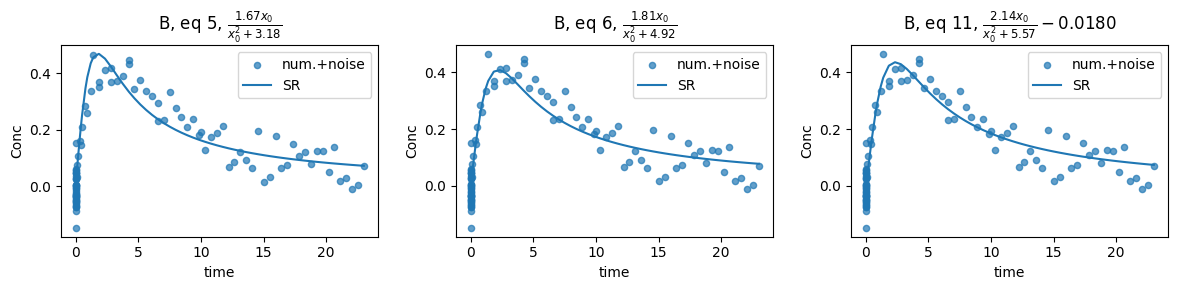

In [ ]:
fig = plt.figure(figsize=(12, 3))
for i, j in enumerate([5, 6, 11]):
    ax = fig.add_subplot(1, 3, i + 1)
    y_pred = model.predict(x, j)
    ax.scatter(x, y, label="num.+noise", alpha=0.7, s=20)
    ax.plot(x, y_pred, label="SR")
    ax.legend()
    ax.set_xlabel("time")
    ax.set_ylabel("Conc")
    ax.set_title(f"B, eq {j}, {get_eq(model, j)}", fontsize=12)
plt.tight_layout()

In [ ]:
x = conc["time"].values.reshape(-1, 1)
y = conc["C_noise"].values.reshape(-1, 1)
model.fit(x, y)

/usr/local/lib/python3.10/dist-packages/pysr/sr.py:1837: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pysr/sr.py:1302: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!


PySRRegressor.equations_ = [
	    pick         score                                           equation  \
	0         0.000000e+00                                                 x0   
	1         2.925925e+00                                    exp(0.40178123)   
	2         3.150990e+00                                    x0 * 0.22882786   
	3         2.066681e-02                             square(0.4838188) * x0   
	4         9.490691e-02                      0.13478628 + (0.2251177 * x0)   
	5         4.121557e-07               (1.2251178 * x0) + (0.13478549 - x0)   
	6         2.560572e-01       (x0 * 0.2754291) - square(-0.041900843 * x0)   
	7         1.146455e+00  (-0.007525356 * square(x0)) + (square(-0.61577...   
	8   >>>>  1.473964e+00  (square(x0) * -0.007525356) + (square(square(-...   
	9         6.206147e-02  (square(-0.18033156 + x0) * -0.007525356) + (s...   
	10        7.846920e-02  (square(((-0.3267096 * x0) * 0.28937384) + 0.2...   
	11        1.877860e-02  ((x0 * square(square(0.78113586))) + ((square(...   
	
	         loss  complexity  
	0   53.396816           1  
	1    2.862873           2  
	2    0.122559           3  
	3    0.120052           4  
	4    0.109182           5  
	5    0.109182           7  
	6    0.084518           8  
	7    0.026856           9  
	8    0.006151          10  
	9    0.005433          12  
	10   0.004644          14  
	11   0.004557          15  
]

In [ ]:
model.equations_

,complexity,loss,score,equation,sympy_format,lambda_format
0,1,53.396816,0.000000e+00,x0,x0,PySRFunction(X=>x0)
1,2,2.862873,2.925925e+00,exp(0.40178123),1.49448434856925,PySRFunction(X=>1.49448434856925)
2,3,0.122559,3.150990e+00,x0 * 0.22882786,0.22882786*x0,PySRFunction(X=>0.22882786*x0)
3,4,0.120052,2.066681e-02,square(0.4838188) * x0,0.23408063123344*x0,PySRFunction(X=>0.23408063123344*x0)
4,5,0.109182,9.490691e-02,0.13478628 + (0.2251177 * x0),0.2251177*x0 + 0.13478628,PySRFunction(X=>0.2251177*x0 + 0.13478628)
5,7,0.109182,4.121557e-07,(1.2251178 * x0) + (0.13478549 - x0),0.2251178*x0 + 0.13478549,PySRFunction(X=>0.2251178*x0 + 0.13478549)
6,8,0.084518,2.560572e-01,(x0 * 0.2754291) - square(-0.041900843 * x0),-0.00175568064411065*x0**2 + 0.2754291*x0,PySRFunction(X=>-0.00175568064411065*x0**2 + 0...
7,9,0.026856,1.146455e+00,(-0.007525356 * square(x0)) + (square(-0.61577...,-0.007525356*x0**2 + 0.37918456503853*x0,PySRFunction(X=>-0.007525356*x0**2 + 0.3791845...
8,10,0.006151,1.473964e+00,(square(x0) * -0.007525356) + (square(square(-...,-0.007525356*x0**2 + 0.361034233610806*x0,PySRFunction(X=>-0.007525356*x0**2 + 0.3610342...
9,12,0.005433,6.206147e-02,(square(-0.18033156 + x0) * -0.007525356) + (s...,0.361034233610806*x0 - 0.007525356*(x0 - 0.180...,PySRFunction(X=>0.361034233610806*x0 - 0.00752...


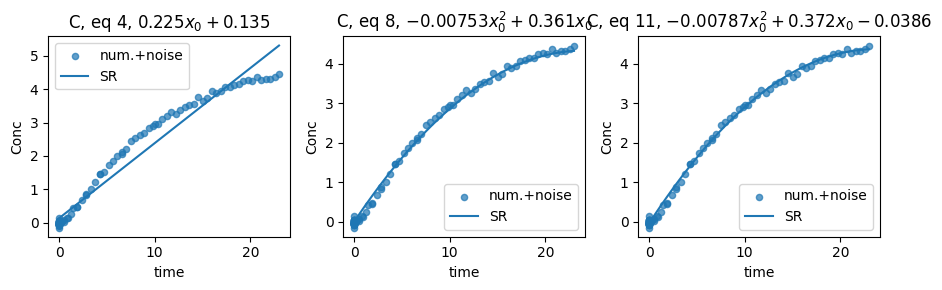

In [ ]:
fig = plt.figure(figsize=(9, 3))
for i, j in enumerate([4, 8, 11]):
    ax = fig.add_subplot(1, 3, i + 1)
    y_pred = model.predict(x, j)
    ax.scatter(x, y, label="num.+noise", alpha=0.7, s=20)
    ax.plot(x, y_pred, label="SR")
    ax.legend()
    ax.set_xlabel("time")
    ax.set_ylabel("Conc")
    ax.set_title(f"C, eq {j}, {get_eq(model, j)}", fontsize=12)
plt.tight_layout()

In [ ]:
model = PySRRegressor(
    niterations=50,
    binary_operators=["+", "*", "-", "/"],
    unary_operators=[
        "square",
        "exp",
        "inv(x) = 1/x",
    ],
    extra_sympy_mappings={"inv": lambda x: 1 / x},
    elementwise_loss="loss(prediction, target) = (prediction - target)^2",
)

In [ ]:
x = conc["time"].values.reshape(-1, 1)
y = conc["B_noise"].values.reshape(-1, 1)
model.fit(x, y)

/usr/local/lib/python3.10/dist-packages/pysr/sr.py:1302: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 1.020e+05
Head worker occupation: 15.2%
Progress: 235 / 750 total iterations (31.333%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
2           2.223e-02  7.971e+00  y = square(-0.34068)
5           2.199e-02  3.603e-03  y = 0.1034 + (0.0020957 * x₀)
6           1.336e-02  4.986e-01  y = (x₀ / exp(x₀)) * x₀
7           1.087e-02  2.056e-01  y = (square(x₀) / exp(x₀)) + 0.049819
8           3.513e-03  1.130e+00  y = (x₀ / square(x₀ - -1.8342)) * 2.6272
9           2.719e-03  2.560e-01  y = (x₀ / (square(x₀) + square(2.2488))) * 2.0215
10          2.653e-03  2.483e-02  y = (x₀ / (square(x₀) + (3.378 + 1.9241))) * 1.9709
11          2.556e-03  3.710e-02  y = ((x₀ + x₀) / (square(x₀) + exp(1.688))) - 0.012603
12          2.547e-03  3.574e-03  y = ((x₀ + x₀) / (square(x₀) + (1.8443 / 0.35719))) + -0.00796...
                                  02
13

PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                square(-0.34068054)   
	1         0.018628                                       x0 / exp(x0)   
	2         0.472170                               square(x0) / exp(x0)   
	3         0.640936                      x0 / (square(x0) + 1.8341979)   
	4         0.000048                 x0 / (square(x0) + exp(0.5979066))   
	5   >>>>  0.974441                (x0 + x0) / (5.447266 + square(x0))   
	6         0.000890  1.9705901 * (x0 / (square(x0) + square(-2.3121...   
	7         0.063053  (x0 / (square(x0 * -0.6840682) + 2.5511537)) +...   
	8         0.039652  (x0 / exp(x0 * 0.14320205)) / (x0 + inv(0.5176...   
	9         0.007154  (x0 / exp(x0 * 0.14320205)) / (x0 + inv(exp(-0...   
	10        0.000278  (x0 / exp(x0 / exp(square(square(1.1790534))))...   
	11        0.018824  ((x0 + -0.024498362) / exp(x0 / exp(square(squ...   
	12        0.006086  ((x0 + -0.024498362) / exp(x0 / exp(square(squ...   
	13        0.000869  ((x0 + -0.024498362) / exp(x0 / exp(square(squ...   
	14        0.001727  ((x0 + -0.024498362) / exp(x0 / exp(square(squ...   
	
	        loss  complexity  
	0   0.022230           2  
	1   0.021417           4  
	2   0.013357           5  
	3   0.007036           6  
	4   0.007036           7  
	5   0.002655           8  
	6   0.002653           9  
	7   0.002491          10  
	8   0.002394          11  
	9   0.002377          12  
	10  0.002375          15  
	11  0.002287          17  
	12  0.002273          18  
	13  0.002271          19  
	14  0.002268          20  
]

In [ ]:
model.equations_

,complexity,loss,score,equation,sympy_format,lambda_format
0,2,0.022230,0.000000,square(-0.34068054),0.116063230334692,PySRFunction(X=>0.116063230334692)
1,4,0.021417,0.018628,x0 / exp(x0),x0*exp(-x0),PySRFunction(X=>x0*exp(-x0))
2,5,0.013357,0.472170,square(x0) / exp(x0),x0**2*exp(-x0),PySRFunction(X=>x0**2*exp(-x0))
3,6,0.007036,0.640936,x0 / (square(x0) + 1.8341979),x0/(x0**2 + 1.8341979),PySRFunction(X=>x0/(x0**2 + 1.8341979))
4,7,0.007036,0.000048,x0 / (square(x0) + exp(0.5979066)),x0/(x0**2 + 1.8183083666663),PySRFunction(X=>x0/(x0**2 + 1.8183083666663))
5,8,0.002655,0.974441,(x0 + x0) / (5.447266 + square(x0)),2*x0/(x0**2 + 5.447266),PySRFunction(X=>2*x0/(x0**2 + 5.447266))
6,9,0.002653,0.000890,1.9705901 * (x0 / (square(x0) + square(-2.3121...,1.9705901*x0/(x0**2 + 5.34608525289609),PySRFunction(X=>1.9705901*x0/(x0**2 + 5.346085...
7,10,0.002491,0.063053,(x0 / (square(x0 * -0.6840682) + 2.5511537)) +...,x0/(0.46794930225124*x0**2 + 2.5511537) - 0.01...,PySRFunction(X=>x0/(0.46794930225124*x0**2 + 2...
8,11,0.002394,0.039652,(x0 / exp(x0 * 0.14320205)) / (x0 + inv(0.5176...,x0*exp(-0.14320205*x0)/(x0 + 1.93175794609314),PySRFunction(X=>x0*exp(-0.14320205*x0)/(x0 + 1...
9,12,0.002377,0.007154,(x0 / exp(x0 * 0.14320205)) / (x0 + inv(exp(-0...,x0*exp(-0.14320205*x0)/(x0 + 1.82199189423562),PySRFunction(X=>x0*exp(-0.14320205*x0)/(x0 + 1...


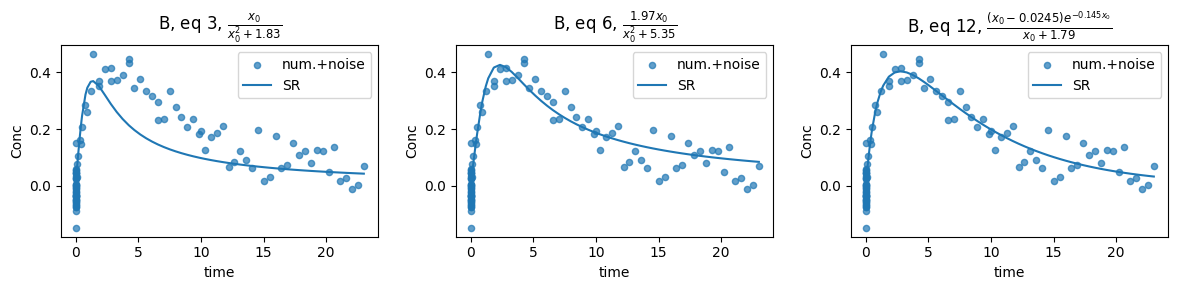

In [ ]:
fig = plt.figure(figsize=(12, 3))
for i, j in enumerate([3, 6, 12]):
    ax = fig.add_subplot(1, 3, i + 1)
    y_pred = model.predict(x, j)
    ax.scatter(x, y, label="num.+noise", alpha=0.7, s=20)
    ax.plot(x, y_pred, label="SR")
    ax.legend()
    ax.set_xlabel("time")
    ax.set_ylabel("Conc")
    ax.set_title(f"B, eq {j}, {get_eq(model, j)}", fontsize=12)
plt.tight_layout()

In [ ]:
model = PySRRegressor(
    niterations=50,
    binary_operators=["+", "*", "-", "/"],
    unary_operators=[
        "square",
        "exp",
        "inv(x) = 1/x",
    ],
    extra_sympy_mappings={"inv": lambda x: 1 / x},
    elementwise_loss="loss(prediction, target) = (prediction - target)^2",
)
x = conc["time"].values.reshape(-1, 1)
y = conc["B"].values.reshape(-1, 1)
model.fit(x, y)

/usr/local/lib/python3.10/dist-packages/pysr/sr.py:1302: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 7.510e+04
Head worker occupation: 14.9%
Progress: 161 / 750 total iterations (21.467%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
2           1.665e-02  7.971e+00  y = square(0.35075)
6           1.092e-02  1.054e-01  y = 0.15253 / exp(inv(exp(x₀)))
7           4.450e-03  8.980e-01  y = x₀ * inv(square(x₀) - -2.053)
8           6.592e-04  1.909e+00  y = (x₀ / square(x₀ + 2.0697)) / 0.32248
9           2.019e-04  1.183e+00  y = (x₀ / (exp(1.771) + square(x₀))) * 2.0125
11          1.975e-04  1.102e-02  y = (x₀ / (square(x₀) + (square(2.3269) + x₀))) * 2.244
12          1.917e-04  2.978e-02  y = (x₀ / (square(x₀ - -0.32749) + exp(1.7354))) / square(0.67...
                                  924)
15          1.716e-04  3.697e-02  y = (x₀ / ((exp(exp(0.59303)) - inv(exp(x₀))) + square(x₀))) *...
                                   square(1.4188)


PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                          0.6690503   
	1         2.939372                                  square(0.3507531)   
	2         0.005659                  (0.0022713188 * x0) + 0.109332934   
	3         1.305298                       x0 / (1.989638 + square(x0))   
	4         1.537586        1.9900291 * (x0 / (5.6948147 + square(x0)))   
	5         0.024763   (x0 / (square(x0) + exp(1.7840922))) * 1.9993489   
	6         0.023032  (x0 / (5.5926504 + square(x0 - -0.08538739))) ...   
	7         0.007481  (x0 / (square(2.4287152) + square(x0 + 0.23183...   
	8         0.031486  3.0826242 * (x0 / ((square(x0 / -0.8382899) + ...   
	9         0.120620  x0 / (((0.4787433 * square(x0)) + exp(1.460504...   
	10  >>>>  0.208150  (x0 / (square((-0.6645049 / 0.28675932) - x0) ...   
	
	        loss  complexity  
	0   0.314765           1  
	1   0.016651           2  
	2   0.016370           5  
	3   0.004438           6  
	4   0.000205           8  
	5   0.000200           9  
	6   0.000195          10  
	7   0.000194          11  
	8   0.000188          12  
	9   0.000148          14  
	10  0.000079          17  
]

In [ ]:
model.equations_

,complexity,loss,score,equation,sympy_format,lambda_format
0,1,0.314765,0.000000,0.6690503,0.669050300000000,PySRFunction(X=>0.669050300000000)
1,2,0.016651,2.939372,square(0.3507531),0.123027737159610,PySRFunction(X=>0.123027737159610)
2,5,0.016370,0.005659,(0.0022713188 * x0) + 0.109332934,0.0022713188*x0 + 0.109332934,PySRFunction(X=>0.0022713188*x0 + 0.109332934)
3,6,0.004438,1.305298,x0 / (1.989638 + square(x0)),x0/(x0**2 + 1.989638),PySRFunction(X=>x0/(x0**2 + 1.989638))
4,8,0.000205,1.537586,1.9900291 * (x0 / (5.6948147 + square(x0))),1.9900291*x0/(x0**2 + 5.6948147),PySRFunction(X=>1.9900291*x0/(x0**2 + 5.6948147))
5,9,0.000200,0.024763,(x0 / (square(x0) + exp(1.7840922))) * 1.9993489,1.9993489*x0/(x0**2 + 5.95417229581068),PySRFunction(X=>1.9993489*x0/(x0**2 + 5.954172...
6,10,0.000195,0.023032,(x0 / (5.5926504 + square(x0 - -0.08538739))) ...,2.0063627*x0/((x0 + 0.08538739)**2 + 5.5926504),PySRFunction(X=>2.0063627*x0/((x0 + 0.08538739...
7,11,0.000194,0.007481,(x0 / (square(2.4287152) + square(x0 + 0.23183...,2.1269763*x0/((x0 + 0.23183261)**2 + 5.8986575...,PySRFunction(X=>2.1269763*x0/((x0 + 0.23183261...
8,12,0.000188,0.031486,3.0826242 * (x0 / ((square(x0 / -0.8382899) + ...,3.0826242*x0/(1.42302173236373*x0**2 + x0 + 7....,PySRFunction(X=>3.0826242*x0/(1.42302173236373...
9,14,0.000148,0.120620,x0 / (((0.4787433 * square(x0)) + exp(1.460504...,x0/(0.4787433*x0**2 - exp(exp(-x0)) + 4.308132...,PySRFunction(X=>x0/(0.4787433*x0**2 - exp(exp(...


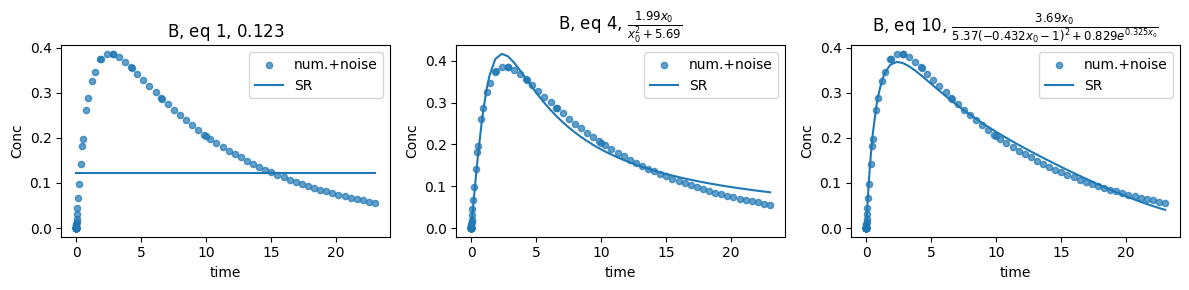

In [ ]:
fig = plt.figure(figsize=(12, 3))
for i, j in enumerate([1, 4, 10]):
    ax = fig.add_subplot(1, 3, i + 1)
    y_pred = model.predict(x, j)
    ax.scatter(x, y, label="num.+noise", alpha=0.7, s=20)
    ax.plot(x, y_pred, label="SR")
    ax.legend()
    ax.set_xlabel("time")
    ax.set_ylabel("Conc")
    ax.set_title(f"B, eq {j}, {get_eq(model, j)}", fontsize=12)
plt.tight_layout()